<a href="https://colab.research.google.com/github/rahmanziaur/DTClassifierTest/blob/main/18_01_2023_Holdout_Data_and_K_Fold.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Step 1 - Loading the Required Libraries and Modules

In [ ]:
# Import required libraries
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import sklearn

# Import necessary modules
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from math import sqrt
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold
from sklearn.model_selection import LeaveOneOut
from sklearn.model_selection import LeavePOut
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import StratifiedKFold

Step 2 - Reading the Data and Performing Basic Data Checks

In [ ]:
dat = pd.read_csv('diabetes.csv') 
print(dat.shape)
dat.describe().transpose()

(768, 9)


,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


Step 3 - Creating Arrays for the Features and the Response Variable

In [ ]:
x1 = dat.drop('Outcome', axis=1).values 
y1 = dat['Outcome'].values

#Step 4 - Trying out Different Model Validation Techniques

Holdout Validation Approach - Train and Test Set Split

The holdout validation approach refers to creating the training and the holdout sets, also referred to as the 'test' or the 'validation' set. The training data is used to train the model while the unseen data is used to validate the model performance. The common split ratio is 70:30, while for small datasets, the ratio can be 90:10.

I will use the 70:30 ratio split for the test dataset. The first line of code splits the data into the training and the test data. The second line instantiates the LogisticRegression() model, while the third line fits the model on the training data. The fourth line uses the trained model to generate scores on the test data, while the fifth line prints the accuracy result.


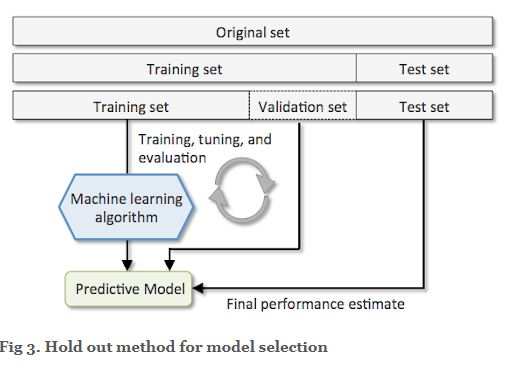

In [ ]:
X_train, X_test, Y_train, Y_test = model_selection.train_test_split(x1, y1, test_size=0.30, random_state=100)
model = LogisticRegression()
model.fit(X_train, Y_train)
result = model.score(X_test, Y_test)
print("Accuracy: %.2f%%" % (result*100.0))

Accuracy: 75.32%


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


#K-fold Cross-Validation

In k-fold cross-validation, the data is divided into k folds. The model is trained on k-1 folds with one fold held back for testing. This process gets repeated to ensure each fold of the dataset gets the chance to be the held back set. Once the process is completed, we can summarize the evaluation metric using the mean or/and the standard deviation.

I will use 5-fold cross-validation. The first line of code uses the 'model_selection.KFold' function from 'scikit-learn' and creates 5 folds. The second line instantiates the LogisticRegression() model, while the third line fits the model and generates cross-validation scores. The arguments 'x1' and 'y1' represents the predictor and the response array, respectively. The 'cv' argument specifies the number of cross-validation splits. The fourth line prints the mean accuracy result.

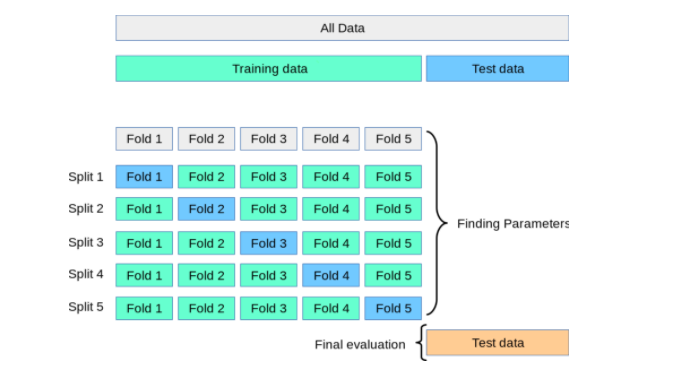

In [ ]:
kfold = model_selection.KFold(n_splits=5, shuffle=True, random_state=100)

In [ ]:
model_kfold = LogisticRegression()

In [ ]:
results_kfold = model_selection.cross_val_score(model_kfold, x1, y1, cv=kfold)

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _che

In [ ]:
print("Accuracy: %.2f%%" % (results_kfold.mean()*100.0)) 

Accuracy: 77.61%
